## 1.K-近邻
我们首先使用电影分类讲解K-近邻算法的基本概念，然后学习如何在其他系统上使用K-近邻算法。

### 1.1 导入数据

In [1]:
import numpy as np
import operator

def createDataSet():
    # 4个样本数据
    group = np.array([[1.0,1.1],
                     [1.0,1.0],
                     [0,0],
                     [0,0.1]])
    # 对应4个分类标签
    labels = ['A','A','B','B']
    return group, labels

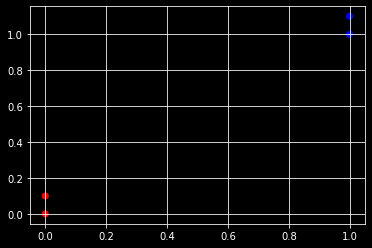

In [2]:
import matplotlib.pyplot as plt

data = [[1.0,1.0,0,0],[1.1,1.0,0,0.1]]
fig, ax = plt.subplots()

ax.scatter(data[0], data[1],c=['blue','blue','red','red'])
ax.grid(which='both',axis='both')

plt.show()

### 1.2 实施简单KNN分类算法
伪代码如下：

对未知类别的数据集中的每个点执行以下操作：

1. 计算已知类别的数据集中的点到当前点的距离

2. 按照距离递增次序排序

3. 选取与当前点距离最小的K个点

4. 确定前K个点的类别出现频率

5. 返回这K个点中出现频率最高的类别作为当前点的预测类别

In [3]:
def classify0(inX, dataSet, labels, k):
    # 数据行数
    dataSetSize = dataSet.shape[0]
    # 复制数据行数的inX 相减
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 相减后平方
    sqDiffMat = diffMat ** 2
    # 按行求和
    sqDistance = np.sum(sqDiffMat, axis=1)
    # 开方
    distance = sqDistance ** 0.5
    # 生成排序后的索引值
    sortedDistIndicies = distance.argsort()
    classCount = {}
    # 距离最近的前K个数据点分类出现频次统计
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    # print(classCount)
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True
    )
    return sortedClassCount[0][0]

# TODO: 1.加入参数，指定距离算法 
# 测试
# group, labels = createDataSet()
# classify0([0.1, 0.9], group, labels, 3)
# classify0(normDataSet[1:2],normDataSet[10:],datingLabels[10:],4)

### 1.3 电影分类
训练数据：

|电影名称|打斗镜头|接吻镜头|电影类型|
|---|---|---|---|
|California Man|3|104|爱情片|
|He's Not Really into Dues|2|100|爱情片|
|Beautiful Woman|1|81|爱情片|
|Kevin Longblade|101|10|动作片|
|Robo Slayer 3000|99|5|动作片|
|Amped Ⅱ|98|2|动作片|

预测数据：

|电影名称|打斗镜头|接吻镜头|电影类型|
|---|---|---|---|
|**|18|90|？|

In [15]:
def createDataSet():
    group = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
    labels = ['爱情片','爱情片','爱情片','动作片','动作片','动作片']

    return group, labels
createDataSet()

group, labels = createDataSet()
# group
classify0([18, 90], group, labels, 2)

'爱情片'

#### 绘图

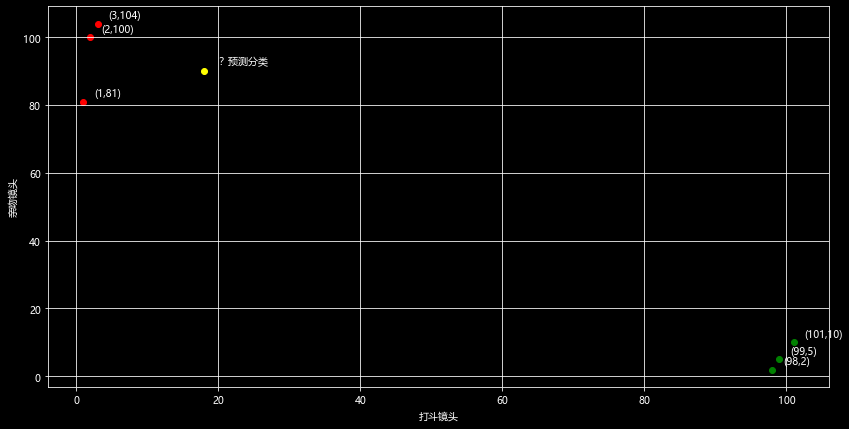

In [5]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig, ax = plt.subplots(figsize=(14,7))

x_a = group[0:3,0]
y_a = group[0:3,1]
x_b = group[3:,0]
y_b = group[3:,1]

ax.scatter(x=x_a, y=y_a, c='red')
ax.scatter(x=x_b, y=y_b, c='green')
ax.scatter(x=18,y=90,c='yellow')

ax.set_xlabel('打斗镜头')
ax.set_ylabel('亲吻镜头')
ax.grid()

for i in range(group.shape[0]):
    dot = group[i,:]
    ax.annotate(text='(%s,%s)'%(dot[0], dot[1]), xy=(dot[0], dot[1]), xytext=(dot[0]+1.5, dot[1]+1.5))

ax.annotate(text='？预测分类',xy=(18,90),xytext=(20,92))

plt.show()

### 1.4 约会配对

特征：【‘每年获得的飞行常客里程数’，‘玩视频游戏所耗时间的百分比’，‘每周消费的冰淇淋公升数’】

标签：【‘不喜欢’，‘一般’，‘喜欢’】
```python
Features=['flight','game','ice']
Labels=['didntLike','smallDoses','largeDoses']
```


#### (1) 读取数据文件，数据和标签分开


In [6]:
import pandas as pd
def readDatingData():
    head = ['flight','game','ice','labels']
    data = pd.read_csv('data\datingTestSet.txt', sep='\t', header=None, names=head, index_col=False)
    # data.head()
    datingDataMat = data.loc[:,['flight','game','ice']]
    datingLabels = data.loc[:,'labels']
    return datingDataMat, datingLabels
datingDataMat, datingLabels = readDatingData()

#### （2）数据可视化

In [7]:
# 按标签 生成散点图的颜色参数
# 方法一  使用循环 判断

# def getColor(x):
#     if x =='largeDoses':
#         return 'r'
#     elif x =='smallDoses':
#         return 'y'
#     elif x =='didntLike':
#         return 'g'

# datingLabels.head()
# datingColor = []
# for label in datingLabels:
#     datingColor.append(getColor(label))

# 方法二 apply 匿名函数
# lambda x: 语句1 if 条件1 else ( 语句2 if 条件2 else 语句3 )
datingColor = datingLabels.apply(lambda x : 'r' if x =='largeDoses' else 'y' if x=='smallDoses' else 'g')
datingColor = datingColor.to_list()


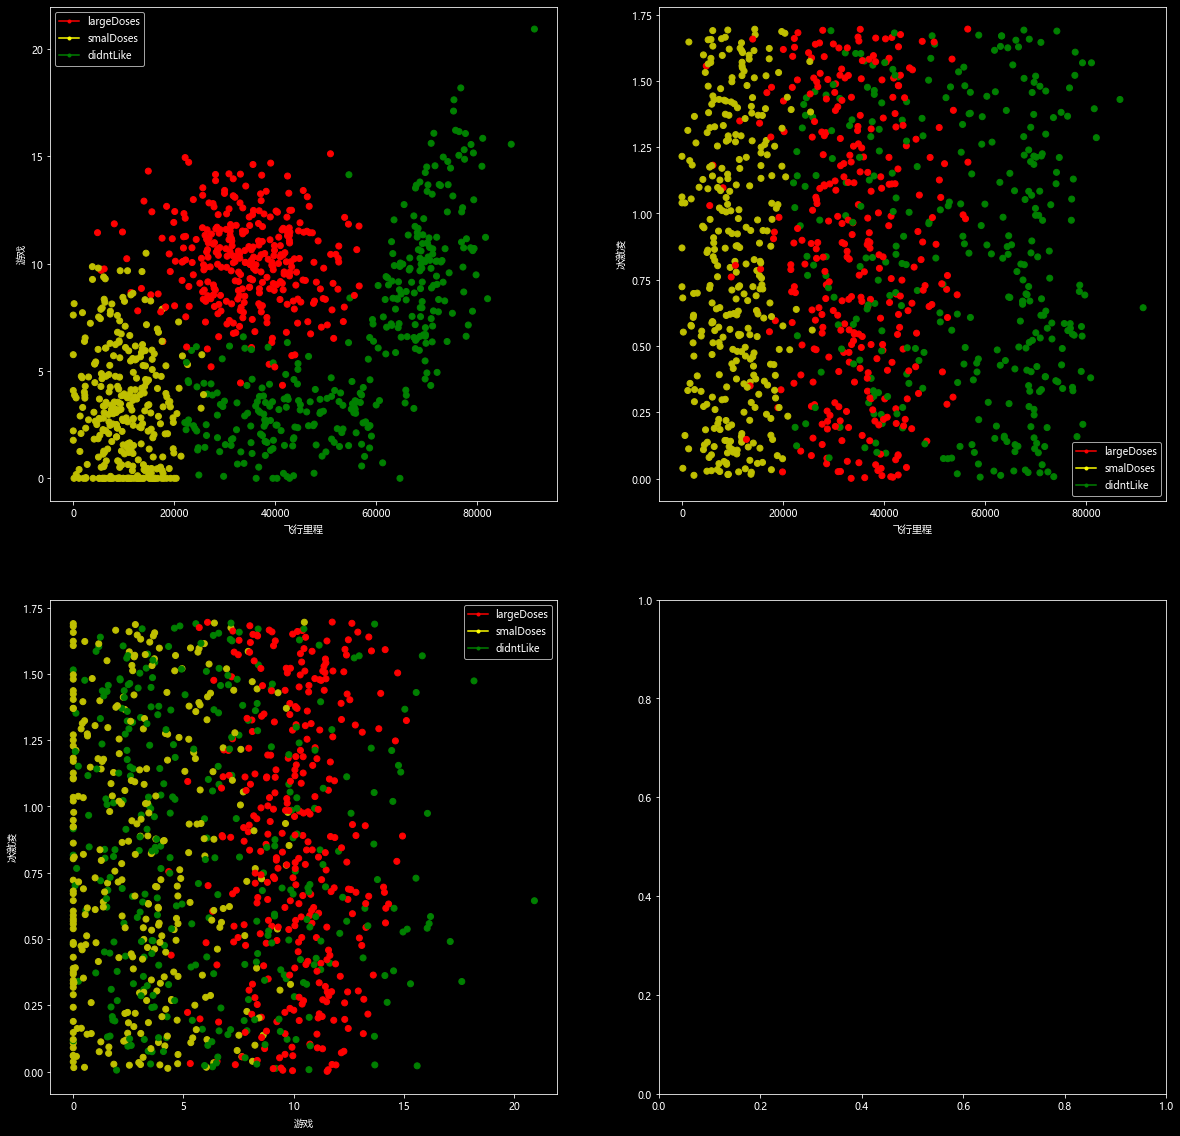

In [8]:
import matplotlib.pyplot as plt
from matplotlib import lines

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(figsize=(20,20),nrows=2,ncols=2)

# flight, game
ax1.scatter(x=datingDataMat.flight,y=datingDataMat.game,c=datingColor)
ax1.set_xlabel('飞行里程')
ax1.set_ylabel('游戏')

largeDoses = lines.Line2D(xdata=[],ydata=[],color='red',label='largeDoses',marker='.',markersize=6)
smalDoses = lines.Line2D(xdata=[],ydata=[],color='yellow',label='smalDoses',marker='.',markersize=6)
didntLike = lines.Line2D(xdata=[],ydata=[],color='green',label='didntLike',marker='.',markersize=6)
ax1.legend(handles=[largeDoses,smalDoses,didntLike])

# flight, ice
ax2.scatter(x=datingDataMat.flight,y=datingDataMat.ice,c=datingColor)
ax2.set_xlabel('飞行里程')
ax2.set_ylabel('冰激凌')

largeDoses = lines.Line2D(xdata=[],ydata=[],color='red',label='largeDoses',marker='.',markersize=6)
smalDoses = lines.Line2D(xdata=[],ydata=[],color='yellow',label='smalDoses',marker='.',markersize=6)
didntLike = lines.Line2D(xdata=[],ydata=[],color='green',label='didntLike',marker='.',markersize=6)
ax2.legend(handles=[largeDoses,smalDoses,didntLike])

# game, ice
ax3.scatter(x=datingDataMat.game,y=datingDataMat.ice,c=datingColor)
ax3.set_xlabel('游戏')
ax3.set_ylabel('冰激凌')

largeDoses = lines.Line2D(xdata=[],ydata=[],color='red',label='largeDoses',marker='.',markersize=6)
smalDoses = lines.Line2D(xdata=[],ydata=[],color='yellow',label='smalDoses',marker='.',markersize=6)
didntLike = lines.Line2D(xdata=[],ydata=[],color='green',label='didntLike',marker='.',markersize=6)
ax3.legend(handles=[largeDoses,smalDoses,didntLike])
plt.show()

#### （3）数据归一化函数
不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。以下是两种常用的归一化方法:

-** min-max标准化（Min-Max Normalization）**

$$ X^* = \frac{x-min}{max-min}$$

-** Z-score标准化方法**

$$ X^* = \dfrac{x-\mu}{\theta} $$

$\mu$ ：均值
$\theta$ ：标准差


In [9]:
def autoNorm(dataSet :pd.DataFrame, mode :str='m') -> pd.DataFrame:
    # min-max方法
    # np.tile(data,(y,x))  np.tile(data,x) 平铺函数  
    if mode =='m': 
        diff = dataSet -  np.tile(dataSet.min(),(dataSet.shape[0],1)) 
        ranges = dataSet.max() - dataSet.min()
        normDataSet = diff / np.tile(ranges,(dataSet.shape[0],1))
    # Z-score方法
    elif mode == 'z':
        diff = dataSet - np.tile(dataSet.mean(),(dataSet.shape[0],1))
        normDataSet = diff / np.tile(dataSet.std(),(dataSet.shape[0],1))
    return normDataSet
normDataSet = autoNorm(datingDataMat)
normDataSet.head()

,flight,game,ice
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578


#### (4) 测试分类器

把数据分成训练集和测试集，输入训练集和测试集后得到分类结果，并对结果进行验证、评估分类器的性能

In [10]:
def classifyTest(dataMat, labelsMat, hoRatio: float = 0.10):
    normDataSet = autoNorm(dataMat)
    testRowNum = int(normDataSet.shape[0] * hoRatio)
    testDataSet = normDataSet[testRowNum:].reset_index(drop=True)
    testLabels = labelsMat[testRowNum:].reset_index(drop=True)
    # print(testRowNum)
    errorCount = 0.0
    for i in range(testRowNum):
        # print(i)
        classResult = classify0(
            normDataSet[i : i + 1],
            testDataSet,
            testLabels,
            3,
        )
        # print('真是结果：%s----预测结果：%s'%(datingLabels[i],classResult))
        if classResult != labelsMat[i]:
            errorCount += 1.0
    print("error rate is: %f" % (errorCount / float(testRowNum)))
classifyTest(datingDataMat,datingLabels)

error rate is: 0.050000


#### (5) 评价分类器

|真实结果|预测结果|预测结果|
|--|--|--|
||正例|反例|
|正例|TP|FN|
|反例|FP|TN|

- 查准率P：`P = TP\(TP+FP)`所有预测出的正例里面，真正的正例的占比。此指标主要目的是减小FP（错误的正例），意味着宁可错过真正的正例也不冒险放宽标准误报正例。


- 查全率R: `R = TP\(TP+FN)`所有真实正例里面，预测出的正例占比。此指标主要目的是增加预测正例


In [11]:
def classifyTestScore(dataMat, labelsMat, hoRatio :float=0.10 ):
    normDataSet = autoNorm(dataMat)
    testRowNum = int(normDataSet.shape[0] * hoRatio)
    scoreMat = {
        'TP':0,
        'FP':0,
        'FN':0,
        'TN':0
    }
    testDataSet = normDataSet[testRowNum:].reset_index(drop=True)
    testLabels = labelsMat[testRowNum:].reset_index(drop=True)
    for i in range(testRowNum):
        classResult = classResult = classify0(
            normDataSet[i : i + 1],
            testDataSet,
            testLabels,
            4,
        )
        # print('真是结果：%s----预测结果：%s'%(datingLabels[i],classResult))
        if classResult == 'largeDoses':
            if classResult == labelsMat[i]:
                scoreMat['TP'] += 1
            else: scoreMat['FP'] += 1
        if classResult == 'didntLike':
            if classResult == labelsMat[i]:
                scoreMat['TN'] += 1
            else: scoreMat['FN'] += 1
    P = scoreMat['TP']/(scoreMat['TP']+scoreMat['FP'])
    R = scoreMat['TP']/(scoreMat['TP']+scoreMat['FN'])
    return scoreMat, P, R
classifyTestScore(datingDataMat, datingLabels)    

({'TP': 28, 'FP': 2, 'FN': 0, 'TN': 36}, 0.9333333333333333, 1.0)

In [12]:
a = pd.DataFrame([0.5047162233423188, 0.6652956797198004, 0.6885105919301004, 0.4650012584093589, 0.20666459839063653, 0.4197430322250497, 0.39379068667927364, 0.4492069646533668, 0.3371532449381069, 0.5594093528127528, 0.5609805351923314, 0.3497392886698178, 0.7930657823146159, 0.6510759767550249, 0.35466665627174826, 0.7155860332584908, 0.6759543341377502, 0.32035481914885894])
b = a[3:]
b

,0
3,0.465001
4,0.206665
5,0.419743
6,0.393791
7,0.449207
8,0.337153
9,0.559409
10,0.560981
11,0.349739
12,0.793066


In [13]:
b.reset_index(drop=True)

,0
0,0.465001
1,0.206665
2,0.419743
3,0.393791
4,0.449207
5,0.337153
6,0.559409
7,0.560981
8,0.349739
9,0.793066


In [14]:
l = [x for x in range(10)]
l[3:4]

[3]